In [11]:
# Importing libraries
import pandas as pd
import numpy as np

# Creating a synthetic dataset
np.random.seed(42)
data = {
    "Bedrooms": np.random.randint(1, 6, size=500),
    "Bathrooms": np.random.randint(1, 4, size=500),
    "SquareFootage": np.random.randint(500, 4000, size=500),
    "LotSize": np.random.uniform(0.1, 5, size=500),
    "YearBuilt": np.random.randint(1900, 2023, size=500),
    "Location": np.random.choice(["Urban", "Suburban", "Rural"], size=500),
    "Price": np.random.randint(100000, 1000000, size=500),
}

# Converting to a DataFrame
df = pd.DataFrame(data)

# Save dataset to CSV for reuse
df.to_csv("house_prices.csv", index=False)

# Display the first few rows of the dataset
print(df.head())


   Bedrooms  Bathrooms  SquareFootage   LotSize  YearBuilt  Location   Price
0         4          2           3060  4.996832       1979     Urban  743340
1         5          1           1819  2.823452       1946     Urban  156481
2         3          2           3891  2.418730       2016  Suburban  887715
3         5          1           3465  1.632989       1914  Suburban  133691
4         5          3           2355  0.690561       1924  Suburban  494341


In [12]:
# Loading the dataset
df = pd.read_csv("house_prices.csv")

# Display dataset information
print("Dataset Info:")
print(df.info())

# Display dataset statistics
print("\nDataset Statistics:")
print(df.describe())

# Display first few rows
print("\nFirst Few Rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bedrooms       500 non-null    int64  
 1   Bathrooms      500 non-null    int64  
 2   SquareFootage  500 non-null    int64  
 3   LotSize        500 non-null    float64
 4   YearBuilt      500 non-null    int64  
 5   Location       500 non-null    object 
 6   Price          500 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 27.5+ KB
None

Dataset Statistics:
         Bedrooms   Bathrooms  SquareFootage     LotSize   YearBuilt  \
count  500.000000  500.000000     500.000000  500.000000   500.00000   
mean     2.970000    1.968000    2316.302000    2.571746  1956.85800   
std      1.425891    0.817504    1041.692016    1.412988    35.78529   
min      1.000000    1.000000     510.000000    0.101164  1900.00000   
25%      2.000000    1.000000    1430

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Encoding categorical features (e.g., Location)
encoder = OneHotEncoder(sparse_output=False)  # Updated parameter for scikit-learn v1.2+
location_encoded = encoder.fit_transform(df[["Location"]])

# Add encoded columns back to the dataframe
encoded_df = pd.DataFrame(location_encoded, columns=encoder.get_feature_names_out(["Location"]))
df = pd.concat([df, encoded_df], axis=1).drop(columns=["Location"])

# Splitting features (X) and target (y)
X = df.drop(columns=["Price"])
y = df["Price"]

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nPreprocessed Training Features:")
print(pd.DataFrame(X_train).head())



Missing Values:
Bedrooms         0
Bathrooms        0
SquareFootage    0
LotSize          0
YearBuilt        0
Location         0
Price            0
dtype: int64

Preprocessed Training Features:
          0         1         2         3         4         5         6  \
0 -0.003558  1.264761  1.438723 -0.092215 -1.043878  1.424887 -0.717741   
1 -0.003558  0.039811 -1.339262 -0.402553 -1.516536 -0.701810 -0.717741   
2  0.708015  1.264761  0.792322  1.352562 -0.209777  1.424887 -0.717741   
3 -0.715130 -1.185139 -1.012214 -0.930892  0.513112  1.424887 -0.717741   
4 -1.426703  1.264761 -0.831375  0.949528  0.985769 -0.701810 -0.717741   

          7  
0 -0.701810  
1  1.424887  
2 -0.701810  
3 -0.701810  
4  1.424887  


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"\nModel Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")



Model Performance:
RMSE: 259955.73
R^2 Score: -0.12


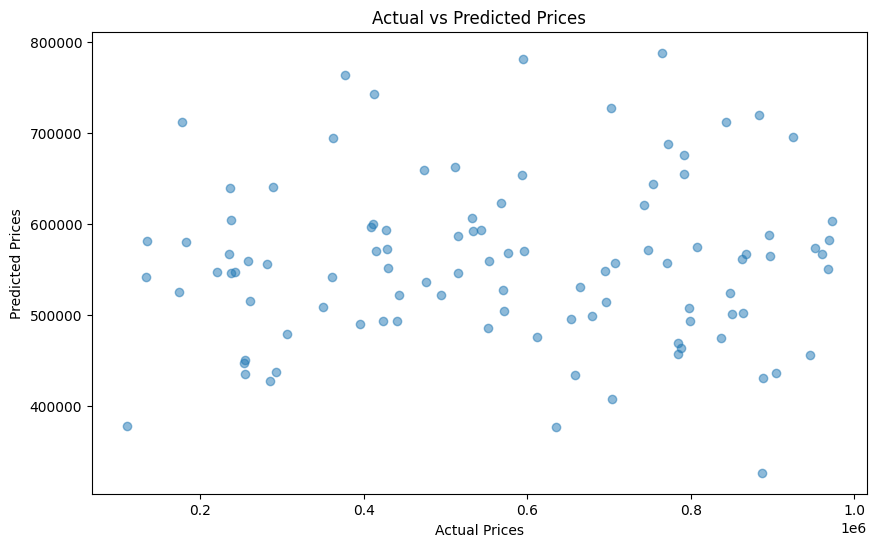

In [15]:
import matplotlib.pyplot as plt

# Scatter plot for predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


In [16]:
import joblib

# Save the model
joblib.dump(model, "house_price_model.pkl")

# Reload the model
loaded_model = joblib.load("house_price_model.pkl")

# Test reloaded model
test_prediction = loaded_model.predict(X_test[:5])
print("\nPredictions from Reloaded Model:")
print(test_prediction)



Predictions from Reloaded Model:
[567440.21 592295.07 378345.52 559880.5  593942.76]
